## **Install dependancies and Import Important libraries**

In [1]:
#to split the dataset folders
! pip install split-folders

In [2]:
#to run the streamlit application
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 17.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 55.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 61.4 MB/s eta 0:00:00


In [3]:
#to run the pyngrok for tokens
! pip install pyngrok

In [4]:
import tensorflow as tf #to use tensorflow
from keras.preprocessing import image  #for data preprocessing in keras
import matplotlib.pyplot as plt #for plotting 
from pyngrok import ngrok #for taking the token to run on local
import streamlit as st #for deploymenton streamlit
from PIL import Image #to import images
import tensorflow_hub as hub #to import tensorflow hub
import numpy as np #to use numpy arrays
from tensorflow import keras #to import keras from tensorflow
from tensorflow.keras.models import load_model  #to load keras model
from tensorflow.keras import preprocessing #for data preprocessing from keras
import time #to calculate the time
from tensorflow.keras.applications.resnet import ResNet101 #to use ResNet101 model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dropout,Dense #for keras layers
from keras.models import Sequential, Model #for keras sequential model
import splitfolders #to split the dataset folders
import sys
import os #to import the operating system
from math import log #to use log from math
import scipy as sp #to use scipy library
from keras.preprocessing.image import ImageDataGenerator #for image generator from keras
import pandas as pd #to deal with pandas dataframes
import seaborn as sns #for plotting using seaborn
import keras #to import keras
from keras.layers import Dense, Dropout, Flatten , Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization #to use batch normalization
from sklearn import metrics #for importing metrics from sklearn
from tensorflow.keras.applications import VGG16  #to use VGG16 model
from sklearn.utils import class_weight #to handle imbalanced data

2023-12-11 12:07:12.071064: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarni

In [5]:
#to extract the data
! unzip 'malimg_dataset.zip' -d ''

Archive:  malimg_dataset.zip
   creating: malimg_paper_dataset_imgs/
   creating: malimg_paper_dataset_imgs/Adialer.C/
  inflating: malimg_paper_dataset_imgs/Adialer.C/000bde2e9a94ba41c0c111ffd80647c2.png  
  inflating: malimg_paper_dataset_imgs/Adialer.C/000e30a0819ac7ed931d629ce2ef8948.png  
  inflating: malimg_paper_dataset_imgs/Adialer.C/002f06eff1d222560939be72583d6ae9.png  
  inflating: malimg_paper_dataset_imgs/Adialer.C/0044f0746b812f6b454ce210bc58c572.png  
  inflating: malimg_paper_dataset_imgs/Adialer.C/0046a83d932a3d431eb21a99b46d6af7.png  
  inflating: malimg_paper_dataset_imgs/Adialer.C/004935acac9e9afc9ffbddb20d5460d4.png  
  inflating: malimg_paper_dataset_imgs/Adialer.C/008a92e720e896caea4a251e6a4c9934.png  
  inflating: malimg_paper_dataset_imgs/Adialer.C/008cadcfa4ca85c4a4aaf901a70868cc.png  
  inflating: malimg_paper_dataset_imgs/Adialer.C/009a2962fe18980a12e5b2d6208dc478.png  
  inflating: malimg_paper_dataset_imgs/Adialer.C/00bb6b6a7be5402fcfce453630bfff19.png  
 

## **Split the dataset into training, Validation and test sets**

In [7]:
#set ratios to split the data
splitfolders.ratio('malimg_paper_dataset_imgs', output="", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 9339 files [00:01, 4705.38 files/s]


In [8]:
#set the image size to 150
img_size = 150

#set the training data
train = ImageDataGenerator().flow_from_directory(directory='train', target_size=(img_size,img_size), batch_size=10000)

#set the validation data
val = ImageDataGenerator().flow_from_directory(directory='val', target_size=(img_size,img_size), batch_size=10000)

#set the testing data
test = ImageDataGenerator().flow_from_directory(directory='test', target_size=(img_size,img_size), batch_size=10000)

Found 7459 images belonging to 25 classes.
Found 923 images belonging to 25 classes.
Found 957 images belonging to 25 classes.


In [9]:
#print the train class indices
train.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [10]:
d = train.class_indices

In [11]:
#show train classes keys
d.keys()

dict_keys(['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A'])

In [12]:
#load train images data and labels
imgs_train, labels_train = next(train)

#load validation images data and labels
imgs_val, labels_val = next(val)

In [13]:
#print the shape of training data
imgs_train.shape

(7459, 150, 150, 3)

In [14]:
#print the shape of training data lqbels
labels_train.shape

(7459, 25)

## **Visualize some images from the dataset**

In [15]:
#to visualize some images from the data
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
  
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1

    #to show images 
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(train.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

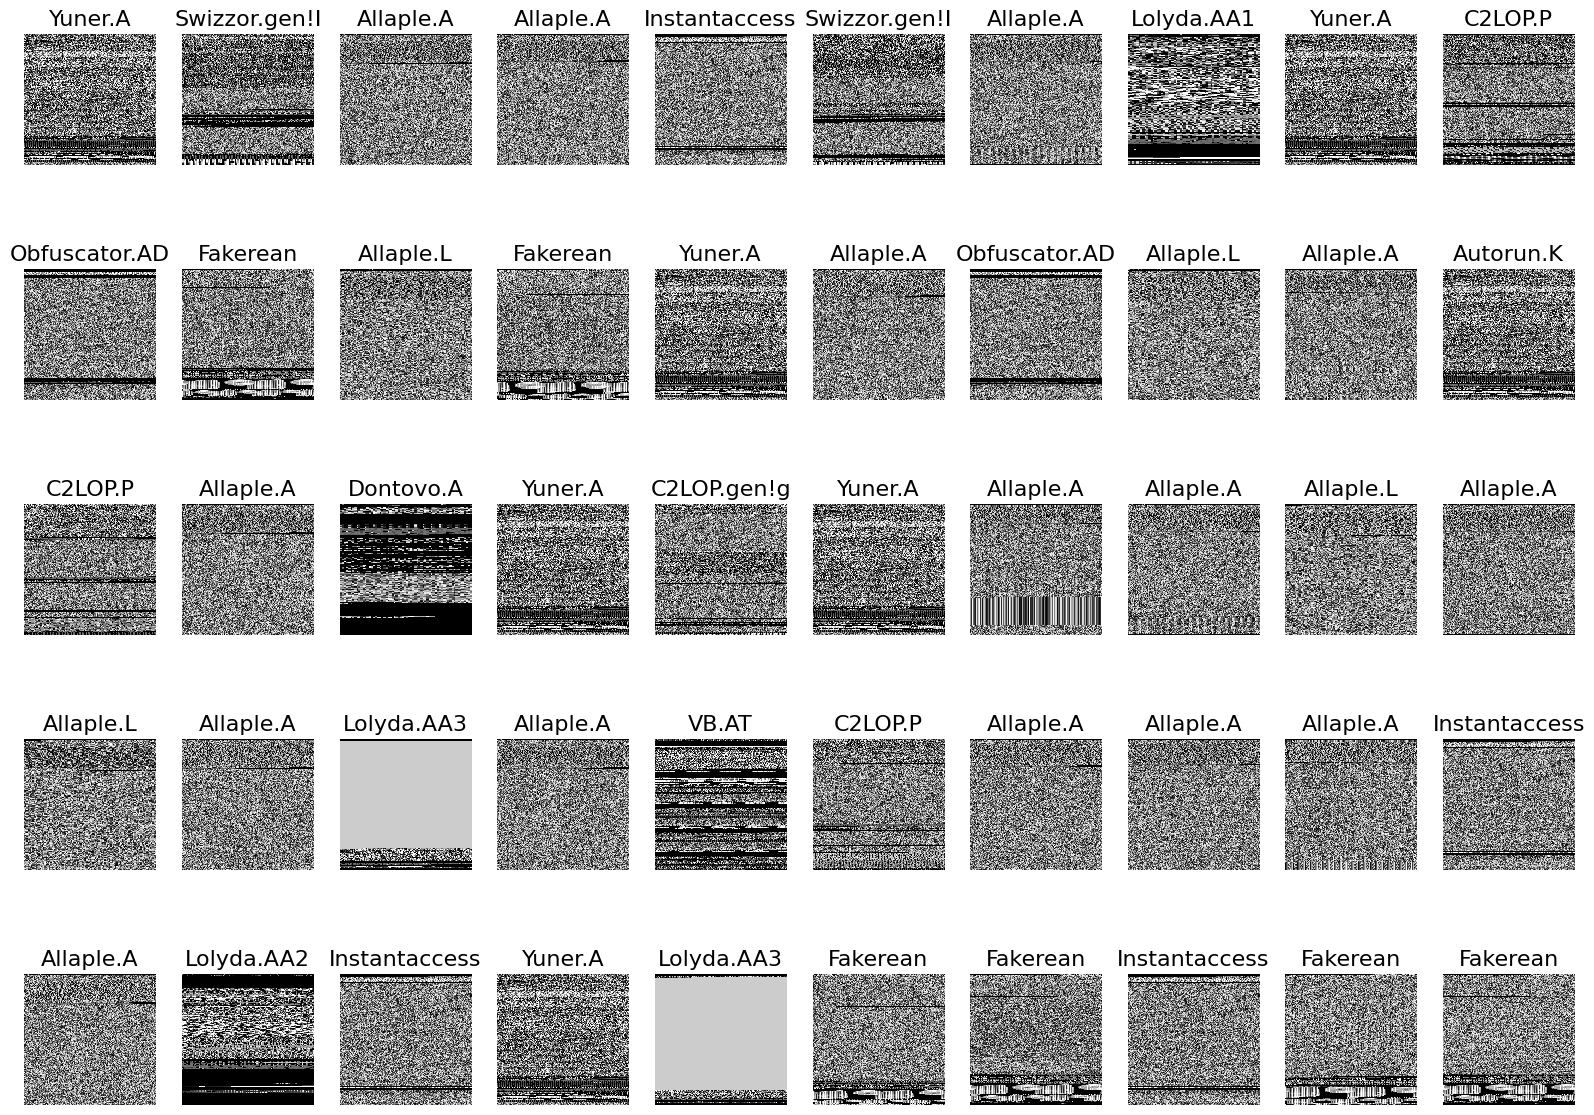

In [16]:
#show the images and their labels
plots(imgs_train, titles = labels_train)

<BarContainer object of 25 artists>

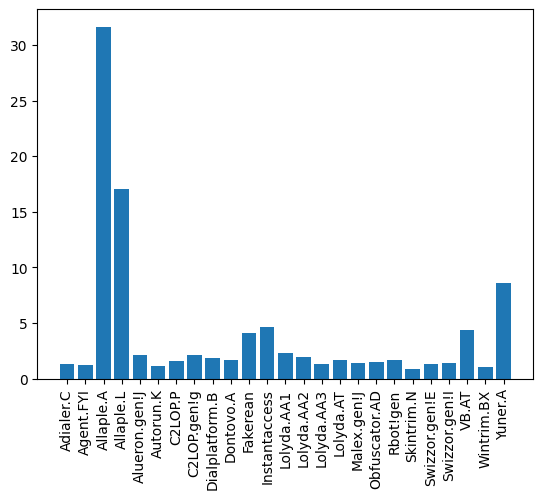

In [17]:
#to print the classes percentage distributions 
classes = train.class_indices.keys()
perc = (sum(labels_train)/labels_train.shape[0])*100

#show the gragh
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

## **Make a helper functions**

In [18]:
#for plotting the confusin matrix
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )

    #to show the confusion matrix plot
    fig = plt.figure(figsize=figsize)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    #set fontsize and style of confusion matrix
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)

    #set the titles of the confusion matrix
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **Train the baseline model as AlexNet**

In [19]:
#define a function for AlexNet model
def Alexnet():
  
  #define the model as sequential model
  model = Sequential()

  #layer 1 of the model  ------>  convolutional layer + max-pooling layer
  model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', 
                   activation='relu', input_shape=(img_size,img_size,3)))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  #layer 2 of the model  ------>  convolutional layer + max-pooling layer
  model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  #layers 3 to 5  of the model  ------>  convolutional layer + 1 max-pooling layer
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                   activation = 'relu'))
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                   activation = 'relu'))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                   activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  #layers 6 to 8 of the model  ------> two fully connected hidden layers and one fully connected output layer

  #make a flatten layer
  model.add(Flatten())
  
  #set the output layer activation as a softmax 
  model.add(Dense(25, activation = 'softmax'))

  #compile the model using adam optimizer
  model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
  
  return model


In [21]:
Alexnet_model = Alexnet()
#print the model summary
Alexnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 35, 35, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 384)         885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 384)        

2023-12-11 12:09:14.913328: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2013930000 exceeds 10% of free system memory.
2023-12-11 12:09:16.238921: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2013930000 exceeds 10% of free system memory.


Epoch 1/50


2023-12-11 12:09:21.706960: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-12-11 12:09:26.362808: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x558771926d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-11 12:09:26.362851: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-12-11 12:09:26.436336: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-11 12:09:27.498082: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


234/234 [==============================] - 19s 22ms/step - loss: 4.1483 - accuracy: 0.5595 - val_loss: 0.6585 - val_accuracy: 0.8267
Epoch 2/50
234/234 [==============================] - 4s 17ms/step - loss: 0.4420 - accuracy: 0.8756 - val_loss: 0.4137 - val_accuracy: 0.8895
Epoch 3/50
234/234 [==============================] - 4s 17ms/step - loss: 0.3304 - accuracy: 0.9045 - val_loss: 0.3667 - val_accuracy: 0.9068
Epoch 4/50
234/234 [==============================] - 4s 17ms/step - loss: 0.2373 - accuracy: 0.9273 - val_loss: 0.2447 - val_accuracy: 0.9242
Epoch 5/50
234/234 [==============================] - 4s 17ms/step - loss: 0.2028 - accuracy: 0.9391 - val_loss: 0.2136 - val_accuracy: 0.9317
Epoch 6/50
234/234 [==============================] - 4s 17ms/step - loss: 0.2094 - accuracy: 0.9347 - val_loss: 0.1874 - val_accuracy: 0.9415
Epoch 7/50
234/234 [==============================] - 4s 17ms/step - loss: 0.1737 - accuracy: 0.9448 - val_loss: 0.1760 - val_accuracy: 0.9534
Epoch 8/5

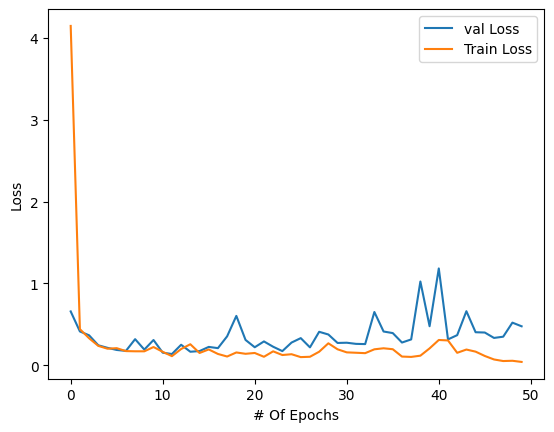

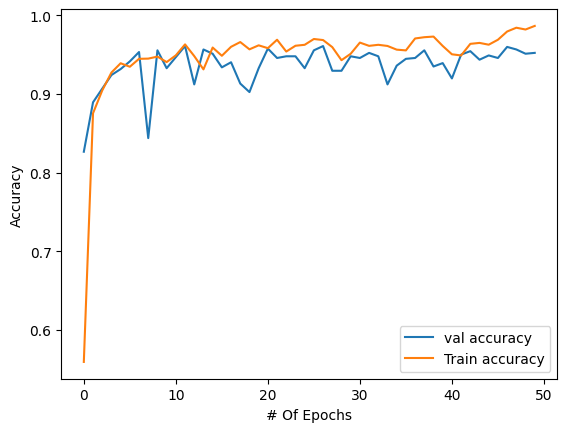

In [22]:
#fit AlexNet model
history_Alexnet= Alexnet_model.fit(imgs_train, 
                                   labels_train, 
                                   validation_data=(imgs_val, labels_val), 
                                   epochs=50)

#for plotting losses curve
loss_training = history_Alexnet.history['loss']
loss_test = history_Alexnet.history['val_loss']

#for plotting accyracies curve
accuracy_training = history_Alexnet.history['accuracy']
accuracy_test = history_Alexnet.history['val_accuracy']

loss_training = history_Alexnet.history['loss']
loss_test = history_Alexnet.history['val_loss']

accuracy_training = history_Alexnet.history['accuracy']
accuracy_test = history_Alexnet.history['val_accuracy']

#for Plotting
plt.plot(loss_test)
plt.plot(loss_training)

#set the titles of losses plot
plt.xlabel("# Of Epochs")
plt.ylabel("Loss")
plt.legend(['val Loss', 'Train Loss'])
plt.show()

#set the titles of accuracies plot
plt.plot(accuracy_test)
plt.plot(accuracy_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Accuracy")
plt.legend(['val accuracy', 'Train accuracy'])
plt.show()

### **Evaluate the Baseline model**

In [23]:
#calculate and print the validation accuracy
scores = Alexnet_model.evaluate(imgs_val, labels_val)
print('Final Alexnet validation  accuraccy : ', scores[1])

29/29 [==============================] - 0s 11ms/step - loss: 0.4768 - accuracy: 0.9523
Final Alexnet validation  accuraccy :  0.9523293375968933


In [24]:
#calculate and print the testing accuracy
imgs_test, labels_test = next(test)
scores_test = Alexnet_model.evaluate(imgs_test, labels_test)
print('Final Alexnet testing accuraccy  : ', scores_test[1])

30/30 [==============================] - 1s 21ms/step - loss: 0.2987 - accuracy: 0.9592
Final Alexnet testing accuraccy  :  0.9592476487159729


In [25]:
#make the model prediction
predict_x=Alexnet_model.predict(imgs_test) 
y_pred_alex=np.argmax(predict_x,axis=1)
y_test_alex = np.argmax(labels_test, axis=1)

30/30 [==============================] - 0s 9ms/step


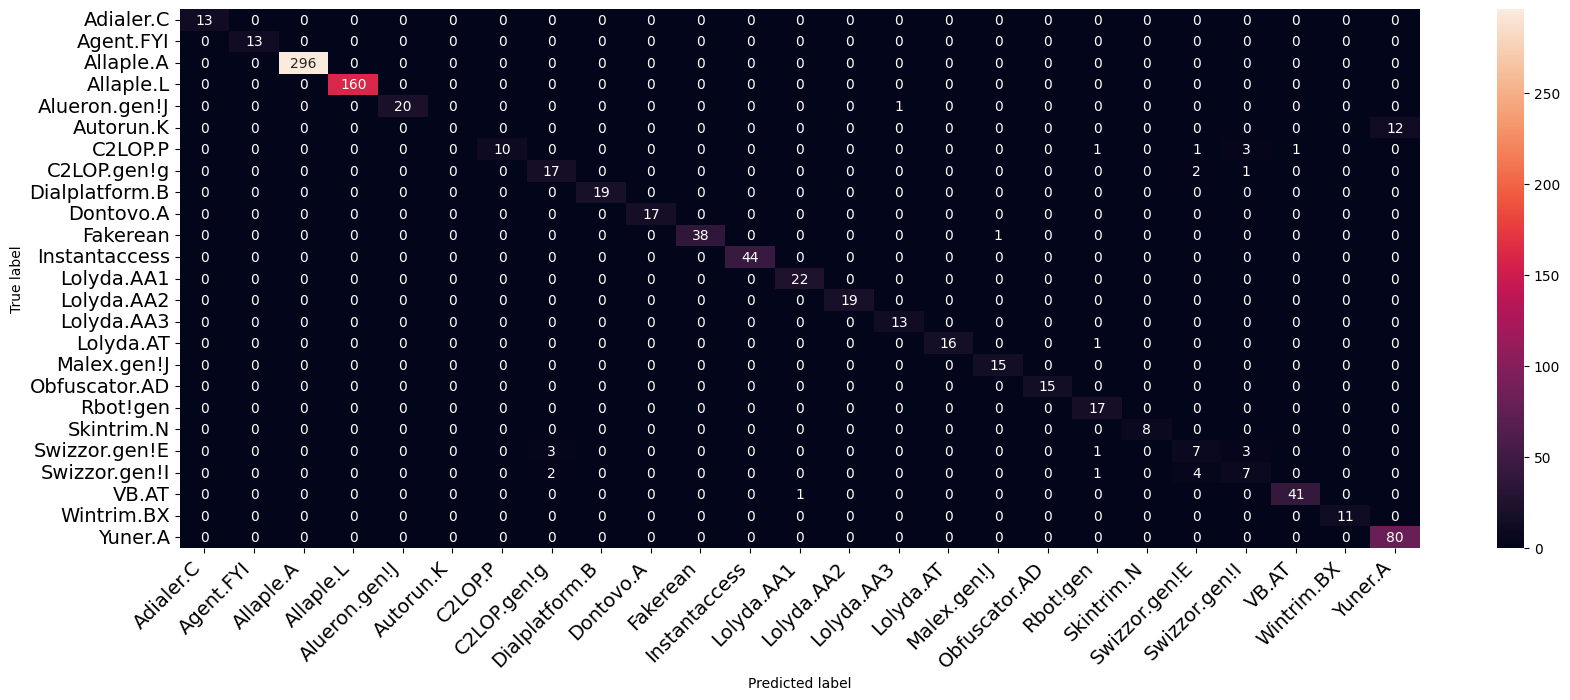

In [26]:
#print the confusion matrix of baseline model
c_matrix_alex = metrics.confusion_matrix(y_test_alex, y_pred_alex)
class_names= test.class_indices.keys()
confusion_matrix(c_matrix_alex, class_names, figsize = (20,7), fontsize=14)

In [27]:
#print classification report of the baseline model
print('testing report :\n',metrics.classification_report(y_test_alex, y_pred_alex))

testing report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00       296
           3       1.00      1.00      1.00       160
           4       1.00      0.95      0.98        21
           5       0.00      0.00      0.00        12
           6       1.00      0.62      0.77        16
           7       0.77      0.85      0.81        20
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        17
          10       1.00      0.97      0.99        39
          11       1.00      1.00      1.00        44
          12       0.96      1.00      0.98        22
          13       1.00      1.00      1.00        19
          14       0.93      1.00      0.96        13
          15       1.00      0.94      0.97        17
          16       0.94      1.00      0.97        15
         

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Build the VGG16 model**

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
Total params: 14,790,233
Trainable params: 14,790,233
Non-trainable params: 0
___________________________________________

2023-12-11 12:13:39.686657: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2013930000 exceeds 10% of free system memory.
2023-12-11 12:13:41.801972: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2013930000 exceeds 10% of free system memory.


Epoch 1/50
234/234 [==============================] - 65s 230ms/step - loss: 2.9631 - accuracy: 0.3980 - val_loss: 0.9105 - val_accuracy: 0.7703
Epoch 2/50
234/234 [==============================] - 49s 209ms/step - loss: 0.4141 - accuracy: 0.8870 - val_loss: 0.2436 - val_accuracy: 0.9350
Epoch 3/50
234/234 [==============================] - 49s 210ms/step - loss: 0.2401 - accuracy: 0.9378 - val_loss: 0.1776 - val_accuracy: 0.9339
Epoch 4/50
234/234 [==============================] - 49s 210ms/step - loss: 0.2576 - accuracy: 0.9319 - val_loss: 0.1443 - val_accuracy: 0.9632
Epoch 5/50
234/234 [==============================] - 49s 210ms/step - loss: 0.1466 - accuracy: 0.9546 - val_loss: 0.1276 - val_accuracy: 0.9621
Epoch 6/50
234/234 [==============================] - 49s 209ms/step - loss: 0.3558 - accuracy: 0.9094 - val_loss: 0.1902 - val_accuracy: 0.9480
Epoch 7/50
234/234 [==============================] - 49s 209ms/step - loss: 0.1633 - accuracy: 0.9499 - val_loss: 0.1481 - val_ac

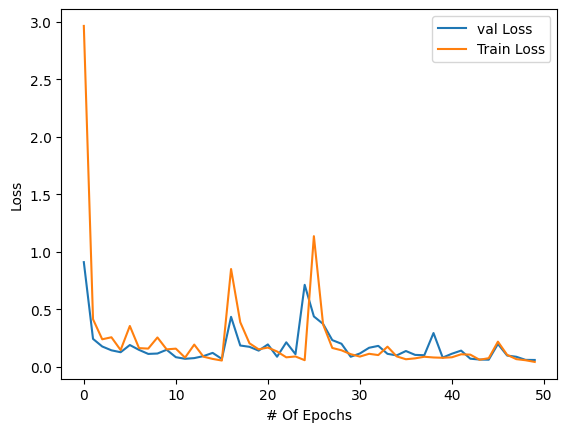

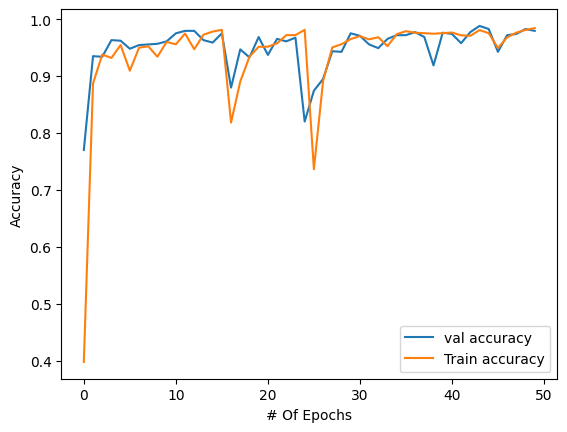

In [28]:
#build the VGG16 model
vgg_model = VGG16(weights='imagenet',include_top=False, input_shape=(img_size,img_size,3),classes=25, pooling="avg")

#make the layers trainable
for layer in vgg_model.layers:
    layer.trainable = True

#build the sequential model
model_vgg = keras.models.Sequential()
model_vgg.add(vgg_model)

#add a flatten layer
model_vgg.add(Flatten())

#add dense layers
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dense(64, activation='relu'))

#add softmax activation function to output layer
model_vgg.add(Dense(25, activation='softmax'))

#print the VGG16 model summary
print(model_vgg.summary())

#compile the VGG16 model 
model_vgg.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

#fit the VGG16 model
history_vgg= model_vgg.fit(imgs_train, labels_train, validation_data=(imgs_val, labels_val), epochs=50)

#plot the losses curves
loss_training = history_vgg.history['loss']
loss_test = history_vgg.history['val_loss']

#plot the accuracies curves
accuracy_training = history_vgg.history['accuracy']
accuracy_test = history_vgg.history['val_accuracy']

loss_training = history_vgg.history['loss']
loss_test = history_vgg.history['val_loss']

accuracy_training = history_vgg.history['accuracy']
accuracy_test = history_vgg.history['val_accuracy']

#for Plotting
plt.plot(loss_test)
plt.plot(loss_training)

#set the titles of the graph
plt.xlabel("# Of Epochs")
plt.ylabel("Loss")
plt.legend(['val Loss', 'Train Loss'])
plt.show()

#set the titles of the graph
plt.plot(accuracy_test)
plt.plot(accuracy_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Accuracy")
plt.legend(['val accuracy', 'Train accuracy'])
plt.show()

### **Evaluate VGG16 model**

In [30]:
#print the accuracy score of VGG16 model
scores = model_vgg.evaluate(imgs_val, labels_val)

29/29 [==============================] - 2s 62ms/step - loss: 0.0604 - accuracy: 0.9794


In [31]:
print('Final VGG  accuracy on validation : ', scores[1])

Final VGG  accuracy on validation :  0.9794149398803711


In [32]:
#calculate the testing accuracy of VGG16 model
imgs_test, labels_test = next(test)
scores_test = model_vgg.evaluate(imgs_test, labels_test)

30/30 [==============================] - 4s 137ms/step - loss: 0.0812 - accuracy: 0.9791


In [33]:
print('Final VGG16 accuracy on testing : ', scores_test[1])

Final VGG16 accuracy on testing :  0.9791013598442078


In [34]:
#make the model predictions
predict_x=model_vgg.predict(imgs_test) 
y_pred_vgg=np.argmax(predict_x,axis=1)

30/30 [==============================] - 2s 61ms/step


In [35]:
y_test_vgg = np.argmax(labels_test, axis=1)

In [36]:
#for calculating confusion matrix
c_matrix_vgg = metrics.confusion_matrix(y_test_vgg, y_pred_vgg)

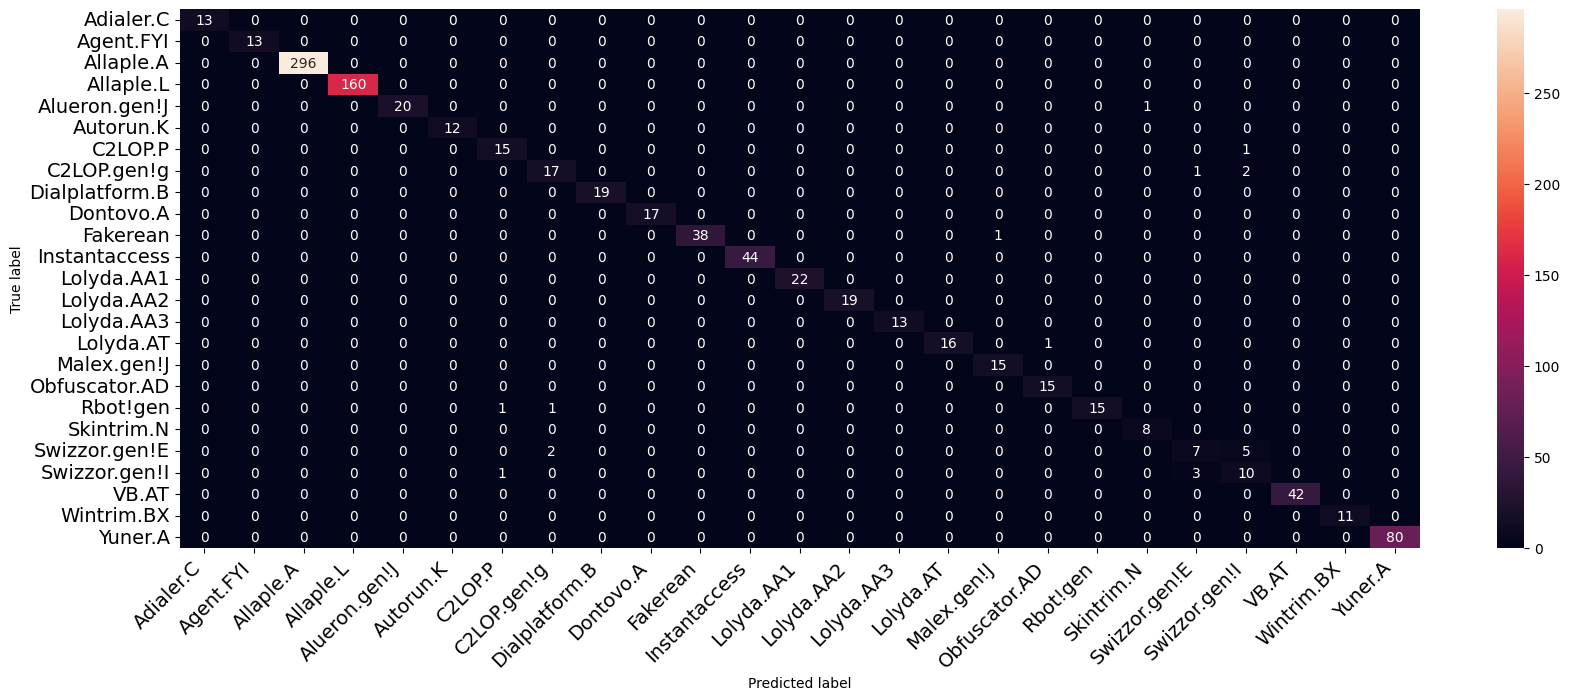

In [37]:
#to plot confusion matrix
class_names= test.class_indices.keys()
confusion_matrix(c_matrix_vgg, class_names, figsize = (20,7), fontsize=14)

In [38]:
#to print the classification report of the VGG16 model
print('testing report :\n',metrics.classification_report(y_test_vgg, y_pred_vgg))

testing report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00       296
           3       1.00      1.00      1.00       160
           4       1.00      0.95      0.98        21
           5       1.00      1.00      1.00        12
           6       0.88      0.94      0.91        16
           7       0.85      0.85      0.85        20
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        17
          10       1.00      0.97      0.99        39
          11       1.00      1.00      1.00        44
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        13
          15       1.00      0.94      0.97        17
          16       0.94      1.00      0.97        15
         

## **Train the ResNet101 model**

In [39]:
num_classes = 25

#define a function for ResNet101 model
def malware_model():
    
    #build the model
    baseModel = ResNet101(weights="imagenet", include_top=False,input_shape=(img_size,img_size,3))

    #make the model as trainable
    for layer in baseModel.layers:
        layer.trainable = False  
     
    #build the model
    headModel = baseModel.output

    #set the maxpooling layer
    headModel = MaxPooling2D(pool_size=(2, 2))(headModel)

    #set a flatten layer
    headModel = Flatten(name="flatten")(headModel)

    #set the dense layer with relu activation
    headModel = Dense(256, activation="relu")(headModel)

    #set a dropout layer
    headModel = Dropout(0.5)(headModel)

    #set output layer with softmax activation function
    headModel = Dense(num_classes, activation="softmax")(headModel)

    #build the model
    model = Model(inputs=baseModel.input, outputs=headModel)

    #compile the model using adam optimizer
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

In [40]:
Malware_model = malware_model()

171446536/171446536 [==============================] - 1s 0us/step


In [41]:
#print the model summary
Malware_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']         

In [42]:
y_train_new = np.argmax(labels_train, axis=1)
y_train_new

array([24, 21,  2, ...,  3,  2, 22])

### **Handle imbalanced data using class weight**

In [43]:
#handle the imbalanced data
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train_new),
                                        y = y_train_new                                                    
                                    )

class_weights = dict(zip(np.unique(y_train_new), y_train_new))
class_weights

{0: 24,
 1: 21,
 2: 2,
 3: 2,
 4: 11,
 5: 21,
 6: 2,
 7: 12,
 8: 24,
 9: 6,
 10: 17,
 11: 10,
 12: 3,
 13: 10,
 14: 24,
 15: 2,
 16: 17,
 17: 3,
 18: 2,
 19: 5,
 20: 6,
 21: 2,
 22: 9,
 23: 24,
 24: 7}

In [44]:
#for model check point 
checkpoint_filepath = 'ResNet_Checkpoints/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

#for early stopping
model_early_stopping_callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    verbose=0,
    mode="max",
)

#to fit the model
history = Malware_model.fit(imgs_train, 
                            labels_train, 
                            validation_data=(imgs_val, labels_val), 
                            epochs=50,  
                            class_weight=class_weights,
                            callbacks=[model_checkpoint_callback,model_early_stopping_callback])

Malware_model.load_weights(checkpoint_filepath)

#save the model
Malware_model.save("ResNet_final.h5")

2023-12-11 12:55:25.851130: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2013930000 exceeds 10% of free system memory.


Epoch 1/50
234/234 [==============================] - 34s 119ms/step - loss: 4.8177 - accuracy: 0.7470 - val_loss: 0.2438 - val_accuracy: 0.9296
Epoch 2/50
234/234 [==============================] - 25s 107ms/step - loss: 2.0620 - accuracy: 0.8677 - val_loss: 0.2484 - val_accuracy: 0.9328
Epoch 3/50
234/234 [==============================] - 25s 107ms/step - loss: 1.7377 - accuracy: 0.8859 - val_loss: 0.1599 - val_accuracy: 0.9632
Epoch 4/50
234/234 [==============================] - 23s 99ms/step - loss: 1.5411 - accuracy: 0.8985 - val_loss: 0.2471 - val_accuracy: 0.8602
Epoch 5/50
234/234 [==============================] - 23s 99ms/step - loss: 1.1799 - accuracy: 0.9175 - val_loss: 0.1186 - val_accuracy: 0.9534
Epoch 6/50
234/234 [==============================] - 25s 107ms/step - loss: 1.3344 - accuracy: 0.9098 - val_loss: 0.1010 - val_accuracy: 0.9718
Epoch 7/50
234/234 [==============================] - 25s 107ms/step - loss: 1.0125 - accuracy: 0.9315 - val_loss: 0.0782 - val_accu

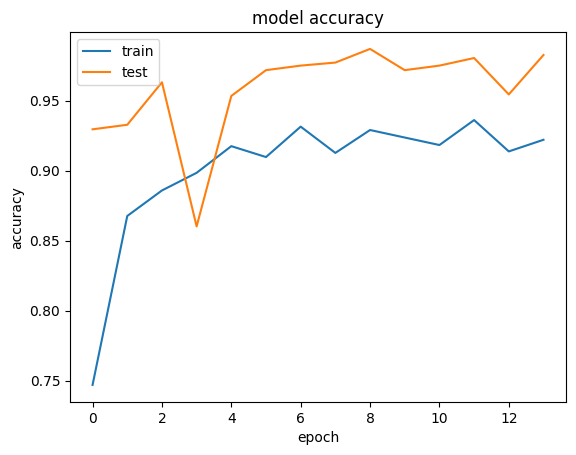

In [45]:
#print the accuracies curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#set the titles of the plot
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

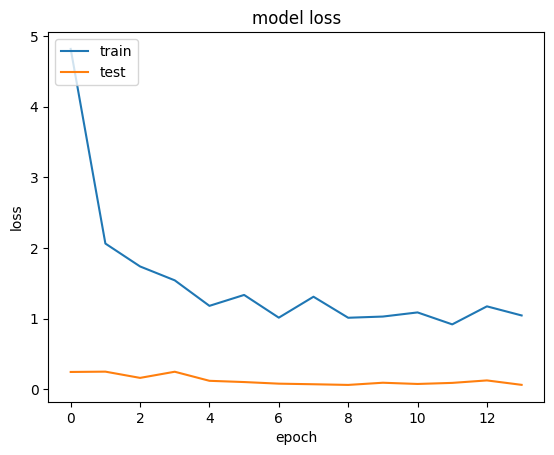

In [46]:
#print the model losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#set the titles of the graph
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Evaluate the model**

In [47]:
scores = Malware_model.evaluate(imgs_val, labels_val)

29/29 [==============================] - 3s 87ms/step - loss: 0.0603 - accuracy: 0.9870


In [48]:
#print the validation accuracy
print('Final CNN accuracyo on validation : ', scores[1])

Final CNN accuracyo on validation :  0.9869989156723022


In [49]:
#to calculate the testing accuracy
imgs_test, labels_test = next(test)

In [50]:
scores_test = Malware_model.evaluate(imgs_test, labels_test)

30/30 [==============================] - 3s 111ms/step - loss: 0.0537 - accuracy: 0.9854


In [51]:
print('Final CNN accuracyo on validation : ', scores_test[1])

Final CNN accuracyo on validation :  0.985370934009552


In [52]:
predict_x=Malware_model.predict(imgs_test) 
y_pred=np.argmax(predict_x,axis=1)

30/30 [==============================] - 4s 84ms/step


In [53]:
y_test2 = np.argmax(labels_test, axis=1)

In [54]:
#for confusion matrix
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [55]:
#to print the classification report
print('testing report :\n',metrics.classification_report(y_test2, y_pred))

testing report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00       296
           3       0.99      0.99      0.99       160
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        12
           6       0.94      1.00      0.97        16
           7       1.00      0.95      0.97        20
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        39
          11       1.00      1.00      1.00        44
          12       0.96      1.00      0.98        22
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        13
          15       1.00      0.94      0.97        17
          16       1.00      1.00      1.00        15
         

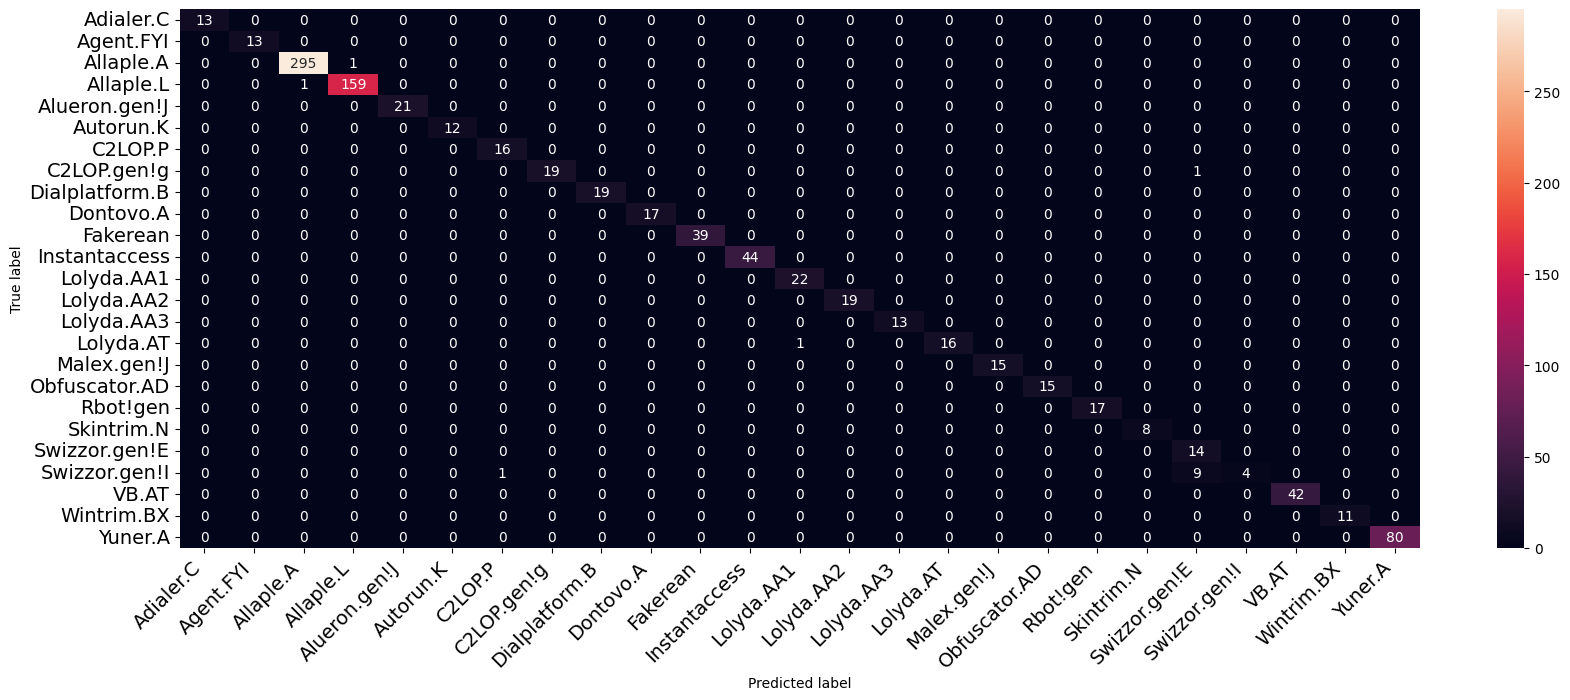

In [56]:
#to print the confusion matrix
class_names= test.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

## **Model Deployment**

Done........
1/1 [==============================] - 2s 2s/step
Adialer.C


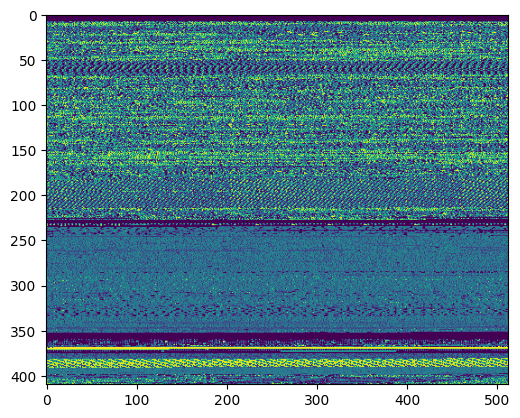

In [57]:
#take the best model for deployment
model =tf.keras.models.load_model('ResNet_final.h5')
print('Done........')
path = 'test/Adialer.C/018066f21bc00a3f0c0477db13511a5f.png' 
z=plt.imread(path)
plt.imshow(z)

img = tf.keras.utils.load_img(path, target_size=(150, 150))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0) 
classes = model.predict(x)
classes = np.argmax(classes)

#set the images labels
label = ['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']
print(label[classes])

In [65]:
ngrok.kill()

#take the token for deployment
NGROK_AUTH_TOKEN="27peAqIGJrYB0ZqjiR28bPyVIwg_3zQrJDftdDDWG17u8TUkC"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [66]:
ngrok.connect(8501)

<NgrokTunnel: "https://aadc-35-202-114-248.ngrok-free.app" -> "http://localhost:8501">

In [67]:
%%writefile app.py
import streamlit as st
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras import preprocessing
import time
import keras

fig = plt.figure()
st.title('malware Classifier')

st.markdown("Welcome to this simple web application that classifies malware")


def main():
    file_uploaded = st.file_uploader("Choose File", type=["png","jpg","jpeg"])
    class_btn = st.button("Classify")
    if file_uploaded is not None:    
        image = Image.open(file_uploaded)
        image = image.convert('RGB')
        st.image(image, caption='Uploaded Image', use_column_width=True)
        
    if class_btn:
        if file_uploaded is None:
            st.write("Invalid command, please upload an image")
        else:
            with st.spinner('Model working....'):
                plt.imshow(image)
                plt.axis("off")
                predictions = predict(image)
                time.sleep(1)
                st.success('Classified')
                st.write(predictions)
                st.pyplot(fig)


def predict(image):
    classifier_model = "ResNet_final.h5"
    IMAGE_SHAPE = (150, 150,3)
    model = load_model(classifier_model, compile=False, custom_objects={'KerasLayer': hub.KerasLayer})
    test_image = image.resize((150,150))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    class_names = ['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']
    predictions = model.predict(test_image)
    result = class_names[np.argmax(predictions)]
    return result


if __name__ == "__main__":
    main()

Overwriting app.py


In [68]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://10.128.0.7:8501
  External URL: http://35.202.114.248:8501

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorf

t=2023-12-11T13:09:11+0000 lvl=warn msg="Stopping forwarder" name=http-8501-9eedfa2b-aaff-455c-9cdb-a86e2ce10e1c acceptErr="failed to accept connection: Listener closed"


^C
  Stopping...


In [69]:
ngrok.kill()

In [70]:
%%writefile Dockerfile
FROM python:3.11.6

WORKDIR /app

COPY requirements.txt ./requirements.txt

RUN pip install -r requirements.txt

EXPOSE 8080

COPY . /app

CMD streamlit run --server.port 8080 --server.enableCORS false app.py


Writing Dockerfile


In [71]:
! gcloud builds submit --tag gcr.io/qwiklabs-asl-02-b800e9b2c381/malware-classification

Creating temporary tarball archive of 18690 file(s) totalling 3.7 GiB before compression.
Uploading tarball of [.] to [gs://qwiklabs-asl-02-b800e9b2c381_cloudbuild/source/1702300162.934387-c12d0d3eaab44f5aa6b3975b4c9bac47.tgz]
Created [https://cloudbuild.googleapis.com/v1/projects/qwiklabs-asl-02-b800e9b2c381/locations/global/builds/09dda9c0-b68d-41cb-b1de-2e46d49ec3e7].
Logs are available at [ https://console.cloud.google.com/cloud-build/builds/09dda9c0-b68d-41cb-b1de-2e46d49ec3e7?project=1034724541334 ].
----------------------------- REMOTE BUILD OUTPUT ------------------------------
starting build "09dda9c0-b68d-41cb-b1de-2e46d49ec3e7"

FETCHSOURCE
Fetching storage object: gs://qwiklabs-asl-02-b800e9b2c381_cloudbuild/source/1702300162.934387-c12d0d3eaab44f5aa6b3975b4c9bac47.tgz#1702300630463826
Copying gs://qwiklabs-asl-02-b800e9b2c381_cloudbuild/source/1702300162.934387-c12d0d3eaab44f5aa6b3975b4c9bac47.tgz#1702300630463826...
- [1 files][  3.6 GiB/  3.6 GiB]   53.8 MiB/s           

In [72]:
! gcloud run deploy malware-classification --image gcr.io/qwiklabs-asl-02-b800e9b2c381/malware-classification --min-instances 1 --max-instances 1 --cpu 1 --allow-unauthenticated --memory 512Mi --region us-central1 

Deploying container to Cloud Run service [malware-classification] in project [qwiklabs-asl-02-b800e9b2c381] region [us-central1]
Deploying new service...                                                       
  . Creating Revision...                                                       
  . Routing traffic...                                                         
  . Setting IAM Policy...                                                      
  Deploying new service...                                                     



⠛ Deploying new service...                                                     



⠹ Deploying new service...                                                     


  ⠹ Setting IAM Policy...                                                      
⠼ Deploying new service...                                                     


  ⠼ Setting IAM Policy...                                                      
⠶ Deploying new service...                                   